## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap

from scipy import stats
from scipy.stats import normaltest

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn import ensemble
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import StackingClassifier

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Прочитаем наш файл с исходными данными:

In [4]:
taxi_data = pd.read_csv("/content/drive/MyDrive/Praktikum/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [5]:
taxi_data['pickup_datetime']= pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data.info()

# Посмотрим на максимальную и минимальную даты
print(taxi_data['pickup_datetime'].agg(['min', 'max']))

# Найдем за сколько месяцев представлены данные
diff_months = (taxi_data['pickup_datetime'].max() - taxi_data['pickup_datetime'].min()) / np.timedelta64(1, 'M')
print(f"Данные представлены за {diff_months} месяцев")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB
min   2016-01-01 00:00:17
max   2016-06-30 23:59:3

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [6]:
print(taxi_data.isna().sum().sum())
# В нашем датафрейме нет пропусков

0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [7]:
# а) Сколько уникальных таксопарков присутствует в данных?
taxi_data['vendor_id'].nunique() # 2 

# б) Каково максимальное количество пассажиров?
taxi_data['passenger_count'].max() # 9

# в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.
round(taxi_data['trip_duration'].mean()) # 959
round(taxi_data['trip_duration'].median()) # 662

# г) Чему равно минимальное и максимальное время поездки (в секундах)?
round(taxi_data['trip_duration'].min()) # 1
round(taxi_data['trip_duration'].max()) # 3526282

3526282

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [8]:
def add_datetime_features(df: pd.DataFrame) -> pd.DataFrame:
  """Функция принимает на вход таблицу с данными о поездках (DataFrame) 
  и возвращает ту же таблицу с добавленными в неё тремя столбцами.

  Args:
      df: входной датафрейм.

  Returns:
      Новый датафрейм с тремя дбавленными столбцами:
            pickup_date — дата включения счётчика/начала поездки (без времени);
            pickup_hour — час включения счётчика;
            pickup_day_of_week — день недели, в который был включён счётчик.
  """
  df['pickup_date'] = df['pickup_datetime'].dt.date
  df['pickup_hour'] = df['pickup_datetime'].dt.hour
  df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()
  return df

taxi_data = add_datetime_features(taxi_data)
taxi_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday


In [9]:
# а) Сколько поездок было совершено в субботу? (day_of_week == 5)
print(len(taxi_data[taxi_data.pickup_day_of_week == 5])) # 220868

# б) Сколько поездок в среднем совершается в день? Ответ округлите до целого
print(taxi_data.groupby('pickup_date').agg(number_of_rides=('id', 'count')).mean()) # 8015

0
number_of_rides    8014.527473
dtype: float64


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [10]:
holiday_data = pd.read_csv('/content/drive/MyDrive/Praktikum/holiday_data.csv', sep=';')
# Преобразуем столбец с датой к тому же формату, что и столбец taxi_data['pickup_holiday']
holiday_data['date'] = pd.to_datetime(holiday_data['date'], format='%Y-%m-%d').dt.date
holiday_data.info()

taxi_data.info()

def add_holiday_features(taxi_data: pd.DataFrame, holiday_data: pd.DataFrame) -> pd.DataFrame:
  """Функция принимает на вход таблицу с данными о поездках 
  и таблицу с  данными о праздничных днях и добавляет бинарный признак 
  в таблицу с данными о поездках, обозначающий был ли праздничным день поездки.

  Args:
    taxi_data: входной датафрейм с поездками.
    holiday_data: входной датафрейм с данными о праздничных днях

  Returns:
    Новый датафрейм с добавленным бинарным признаком pickup_holiday,
  """
  taxi_data['pickup_holiday'] = 0
  taxi_data['pickup_holiday'][taxi_data['pickup_date'].isin(holiday_data['date'].values)]=1
  return taxi_data

taxi_data = add_holiday_features(taxi_data, holiday_data)

# Чему равна медианная длительность поездки на такси в праздничные дни?
taxi_data[taxi_data.pickup_holiday == 1]['trip_duration'].median() # 585

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   day      14 non-null     object
 1   date     14 non-null     object
 2   holiday  14 non-null     object
dtypes: object(3)
memory usage: 464.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 

<ipython-input-10-dfc49ff5525f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['pickup_holiday'][taxi_data['pickup_date'].isin(holiday_data['date'].values)]=1


585.0

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [11]:
osrm_data = pd.read_csv('/content/drive/MyDrive/Praktikum/osrm_data_train.csv', 
                        usecols=['id','total_distance', 'total_travel_time', 'number_of_steps'])
def add_osrm_features(taxi_data: pd.DataFrame, osrm_data: pd.DataFrame) -> pd.DataFrame:
  """Функция принимает на вход таблицу с данными о поездках 
  и таблицу с  данными OSRM и объединяет их.

  Args:
    taxi_data: входной датафрейм с поездками.
    osrm_data: входной датафрейм OSRM.
  Returns:
    Новый объединенный датафрейм.
  """
  return taxi_data.merge(osrm_data, how='left', on='id')

taxi_data = add_osrm_features(taxi_data, osrm_data)
taxi_data.head(10)

# а) Чему равна разница (в секундах) между медианной длительностью поездки 
# в данных и медианной длительностью поездки, полученной из OSRM?
trip_duration_median = taxi_data['trip_duration'].median()
total_travel_time_median = taxi_data['total_travel_time'].median()
travel_time_diff = trip_duration_median - total_travel_time_median
print(travel_time_diff) # 372.5

# б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?
taxi_data.shape[0] - taxi_data.dropna().shape[0] # 1

372.5


1

In [12]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [13]:
def add_geographical_features(taxi_data: pd.DataFrame) -> pd.DataFrame:
  """Принимает на вход таблицу с данными о поездках и возвращает обновленную 
  таблицу с добавленными в нее 2 столбцами haversine_distance и direction
  Args:
    taxi_data: входной датафрейм с поездками.
  Returns:
    Новый датафрейм с добавленными столбцами.
  """
  taxi_data['haversine_distance'] = get_haversine_distance(taxi_data['pickup_latitude'],
                                                           taxi_data['pickup_longitude'],
                                                           taxi_data['dropoff_latitude'],
                                                           taxi_data['dropoff_longitude'])
  taxi_data['direction'] = get_angle_direction(taxi_data['pickup_latitude'],
                                               taxi_data['pickup_longitude'],
                                               taxi_data['dropoff_latitude'],
                                               taxi_data['dropoff_longitude'])
  return taxi_data


taxi_data = add_geographical_features(taxi_data)
print(taxi_data['haversine_distance'].median())


2.0937171329263693


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [14]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']], 
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

def add_cluster_features(taxi_data, kmeans):
  """Добавляет данные о кластере в целевой датасет.
  """
  taxi_data['geo_cluster'] = kmeans.predict(
      np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']], 
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
      )
  return taxi_data

taxi_data = add_cluster_features(taxi_data, kmeans)

# Сколько поездок содержится в наименьшем по размеру географическом кластере?
taxi_data.groupby('geo_cluster')['id'].count().min() # 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [15]:
weather_data = pd.read_csv('/content/drive/MyDrive/Praktikum/weather_data.csv', usecols=[
    'date','hour','temperature','visibility','wind speed','precip','events'
])
weather_data['pickup_date'] = pd.to_datetime(weather_data['date'], format='%Y-%m-%d').dt.date
weather_data['pickup_hour'] = weather_data['hour'].astype('int64')
weather_data = weather_data.drop(columns=['date', 'hour'])

def add_weather_features(taxi_data: pd.DataFrame, weather_data: pd.DataFrame) -> pd.DataFrame:
  """Добавляет погодные данные в целевой датафрейм.
  """
  taxi_data = taxi_data.merge(weather_data, how='left', on=['pickup_date','pickup_hour'])
  return taxi_data

taxi_data = add_weather_features(taxi_data, weather_data)

# а) Сколько поездок было совершено в снежную погоду?
taxi_data[~taxi_data.events.isna() & taxi_data.events.str.contains("Snow")]

# б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями?
rows_with_nans_in_weather_data = taxi_data[taxi_data[["temperature", "visibility", "wind speed", "precip", "events"]].isna().any(axis=1)]
percentage = rows_with_nans_in_weather_data.shape[0]/taxi_data.shape[0]*100
print(percentage)

0.8248757064780714


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [52]:
def fill_null_weather_data(taxi_data):    
  ''' Заполняет пропуски в столбцах с погодными данными
  '''
  taxi_data[['temperature', 'visibility', 'wind speed', 'precip']] = taxi_data[[
      'temperature', 'visibility', 'wind speed', 'precip']].fillna(taxi_data.groupby('pickup_date')[[
      'temperature', 'visibility', 'wind speed', 'precip']].transform('median'))
  taxi_data['events'] = taxi_data['events'].fillna('None')
  taxi_data[['total_distance', 'total_travel_time', 'number_of_steps']] = taxi_data[[
      'total_distance', 'total_travel_time', 'number_of_steps']].fillna(taxi_data[[
      'total_distance', 'total_travel_time', 'number_of_steps']].median())
  return taxi_data

taxi_data = fill_null_weather_data(taxi_data)
# Проверим, остались ли пропуски
taxi_data.isnull().values.any()

# Чему равна медиана в столбце temperature после заполнения пропусков? 
print(round(taxi_data.temperature.median(),1))

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


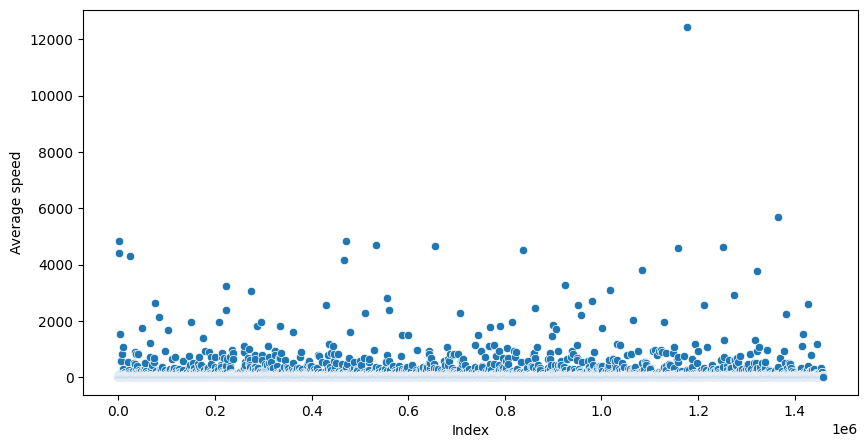

In [17]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [18]:
# а) Сколько выбросов по признаку длительности поездки вам удалось найти?
taxi_data[taxi_data.trip_duration > 86400] # 4

# б) Сколько выбросов по признаку скорости вам удалось найти?
taxi_data[taxi_data.total_distance/taxi_data.trip_duration * 3.6 > 300] # 407

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
842,id3263580,2,2016-05-21 12:46:46,2016-05-21 12:46:49,2,-73.782372,40.648766,-73.782372,40.648746,N,...,3661.3,16.0,0.002121,180.000000,1,17.2,14.5,7.4,0.0,None
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,N,...,2693.5,9.0,0.703065,138.321912,1,24.4,12.9,5.6,0.0,None
3305,id0210376,1,2016-05-10 14:08:36,2016-05-10 14:08:42,1,-73.796432,40.645237,-73.797707,40.645401,N,...,2547.5,12.0,0.109033,-80.369600,1,16.7,16.1,7.4,0.0,None
5992,id3738922,1,2016-02-12 11:33:01,2016-02-12 11:33:09,1,-73.781868,40.644676,-73.781822,40.644588,N,...,1276.7,4.0,0.010493,158.402515,1,-7.2,16.1,7.4,0.0,None
6777,id2891134,1,2016-05-16 08:20:40,2016-05-16 08:20:42,1,-73.963028,40.774895,-73.963020,40.774891,N,...,448.9,6.0,0.000770,123.435049,9,8.0,16.1,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426834,id1499313,1,2016-03-11 16:35:29,2016-03-11 16:35:37,1,-73.957596,40.758183,-73.957603,40.758183,N,...,5802.2,13.0,0.000643,-89.999998,9,17.2,16.1,16.7,0.0,None
1427152,id2789597,1,2016-05-27 23:50:53,2016-05-27 23:50:57,1,-73.977936,40.748436,-73.977974,40.748463,N,...,451.0,6.0,0.004375,-47.262314,0,25.6,12.9,9.3,0.0,None
1433244,id2935356,2,2016-04-26 20:44:01,2016-04-26 20:44:05,1,-73.985100,40.768398,-73.985252,40.768749,N,...,857.6,6.0,0.041085,-18.225840,0,10.6,8.0,14.8,0.0,None
1447397,id0374193,1,2016-06-14 06:25:07,2016-06-14 06:25:19,1,-73.784531,40.646038,-73.786201,40.645290,N,...,3955.5,13.0,0.163658,-120.530238,1,15.6,16.1,11.1,0.0,None


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [19]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

<ipython-input-20-b3369627f45c>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(data=taxi_data, x="trip_duration_log", palette="coolwarm",


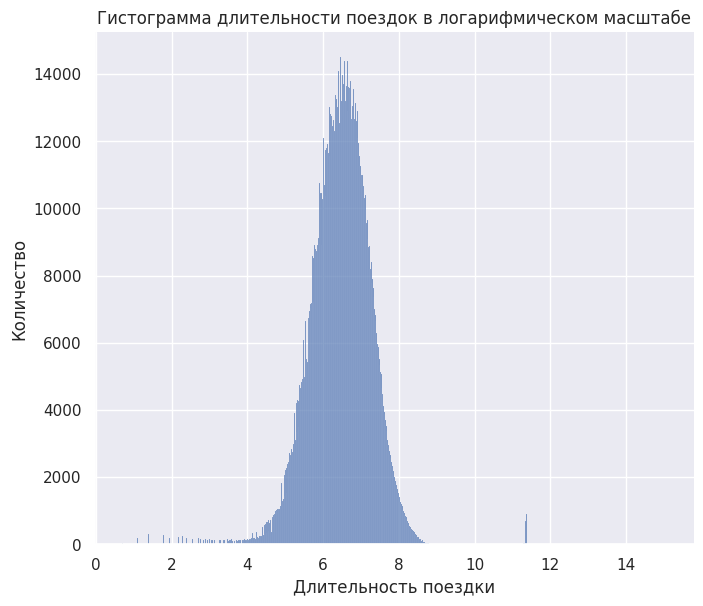

In [20]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set(font_scale=1)
ax = sns.displot(data=taxi_data, x="trip_duration_log", palette="coolwarm",
            height=6, aspect=1.2).set(title='Гистограмма длительности поездок в логарифмическом масштабе')
ax.set(xlabel='Длительность поездки', ylabel='Количество')

In [21]:
import numpy as np
from scipy import stats

k2, p = stats.normaltest(taxi_data['trip_duration_log'])
alpha = 0.05
# а) Чему равен вычисленный p-value?
print("p = {:g}".format(p))

# б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?
if p < alpha:  # Нулевая гипотеза: x является нормальным распределением
  print("Нулевая гипотеза может быть отвергнута")
else:
  print("Нулевая гипотеза не может быть отвергнута")

p = 0
Нулевая гипотеза может быть отвергнута


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

<ipython-input-22-607c7ed0c748>:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.displot(data=taxi_data, x='trip_duration_log', hue='vendor_id', kind='kde',


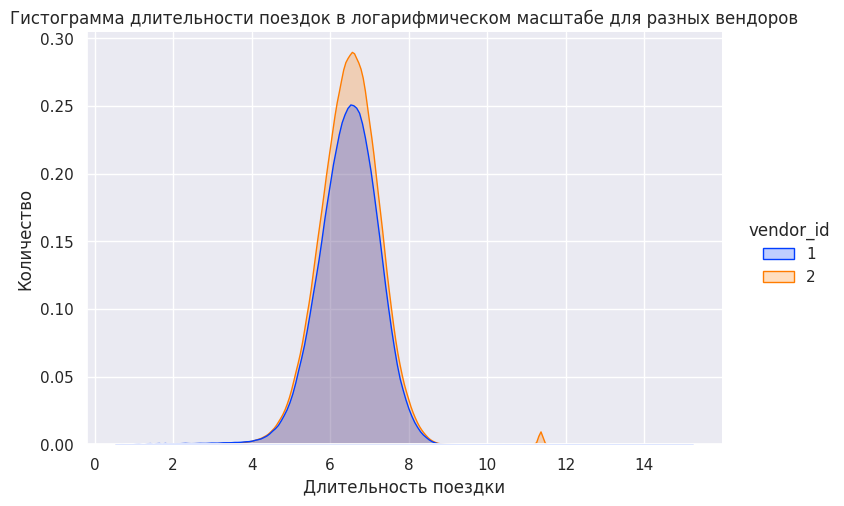

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns


ax = sns.displot(data=taxi_data, x='trip_duration_log', hue='vendor_id', kind='kde', 
            fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5).set(
                title='Гистограмма длительности поездок в логарифмическом масштабе для разных вендоров')
ax.set(xlabel='Длительность поездки', ylabel='Количество')

In [23]:
'''
Как видим, оба графика и для первого и для второго таксопарков симметричны,
но график. для первого парка имеет более остроконечную вершину,
а значит, чуть больший эксцесс. В общих чертах графики очень похожи и 
почти ничем не отличаются, значит vendor_id не влияет на длительность поездки.
'''

'\nКак видим, оба графика и для первого и для второго таксопарков симметричны,\nно график. для первого парка имеет более остроконечную вершину,\nа значит, чуть больший эксцесс. В общих чертах графики очень похожи и \nпочти ничем не отличаются, значит vendor_id не влияет на длительность поездки.\n'

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

id                    8045
vendor_id             8045
pickup_datetime       8045
dropoff_datetime      8045
passenger_count       8045
pickup_longitude      8045
pickup_latitude       8045
dropoff_longitude     8045
dropoff_latitude      8045
store_and_fwd_flag    8045
trip_duration         8045
pickup_date           8045
pickup_hour           8045
pickup_day_of_week    8045
pickup_holiday        8045
total_distance        8045
total_travel_time     8045
number_of_steps       8045
haversine_distance    8045
direction             8045
geo_cluster           8045
temperature           8045
visibility            8045
wind speed            8045
precip                8045
events                8045
trip_duration_log     8045
dtype: int64

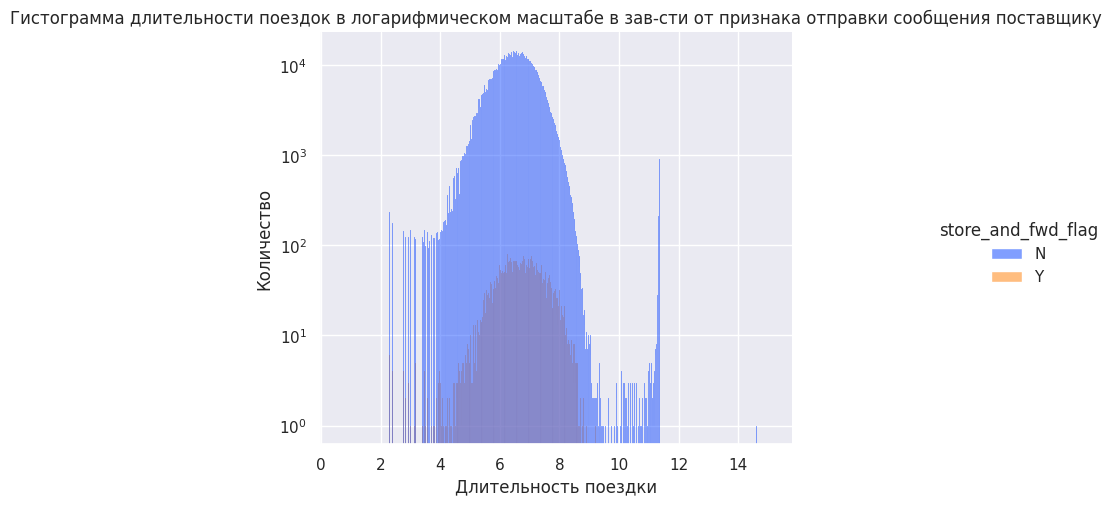

In [24]:

ax = sns.displot(data=taxi_data, x='trip_duration_log', hue='store_and_fwd_flag', kind='hist', 
            fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.2).set(
                title='Гистограмма длительности поездок в логарифмическом масштабе в зав-сти от признака отправки сообщения поставщику')
ax.set(xlabel='Длительность поездки', ylabel='Количество')
plt.yscale('log')

taxi_data[taxi_data.store_and_fwd_flag=='Y'].count()

In [25]:
''' Видим, что графики сильно отличаются,значит признак отправки сообщения поставщику оказывает влияние на длительность поездки.
'''

' Видим, что графики сильно отличаются,значит признак отправки сообщения поставщику оказывает влияние на длительность поездки.\n'

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

In [26]:
fig = px.histogram(
    taxi_data,
    x = 'pickup_hour',
    title = 'Распределение количества поездок в зависимости от часа дня ',
    width = 900, 
    height = 400,
    color_discrete_sequence=["orange", "red"]
)
fig.update_layout(title = dict(x = .5, xanchor = "center"),
                  xaxis_title = "Час суток",
                  yaxis_title="Количество поездок",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [27]:
import plotly.express as px

bar_data = taxi_data[['pickup_hour', 'trip_duration']].groupby('pickup_hour', as_index=False).median()
fig = px.bar(
    bar_data,
    x = 'pickup_hour',
    y = 'trip_duration',
    title = 'Зависимость медианной длительности поездки от часа дня',
    width=900, 
    height=400
)
fig.update_layout(title = dict(x = .5, xanchor = "center"),
                  xaxis_title = "Час дня",
                  yaxis_title="Длительность поездки в сек",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


In [28]:
fig = px.histogram(
    taxi_data,
    x = 'pickup_day_of_week',
    title = 'Распределение количества поездок в зависимости от дня недели ',
    width = 900, 
    height = 400,
    color_discrete_sequence=["orange", "red"]   
)
fig.update_layout(title = dict(x = .5, xanchor = "center"),
                  xaxis_title = "Час суток",
                  yaxis_title="Количество поездок",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [29]:
import plotly.express as px

bar_data = taxi_data[['pickup_day_of_week', 'trip_duration']].groupby('pickup_day_of_week', as_index=False).median()
fig = px.bar(
    bar_data,
    x = 'pickup_day_of_week',
    y = 'trip_duration',
    title = 'Зависимость медианной длительности поездки от дня недели',
    width=900, 
    height=400
)
fig.update_layout(title = dict(x = .5, xanchor = "center"),
                  xaxis_title = "День недели",
                  yaxis_title="Длительность поездки в сек",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

[Text(0.5, 54.249999999999986, 'День недели'),
 Text(91.25, 0.5, 'Час суток'),
 Text(0.5, 1.0, 'Медианное время поездки в зависимости от часа суток и дня недели')]

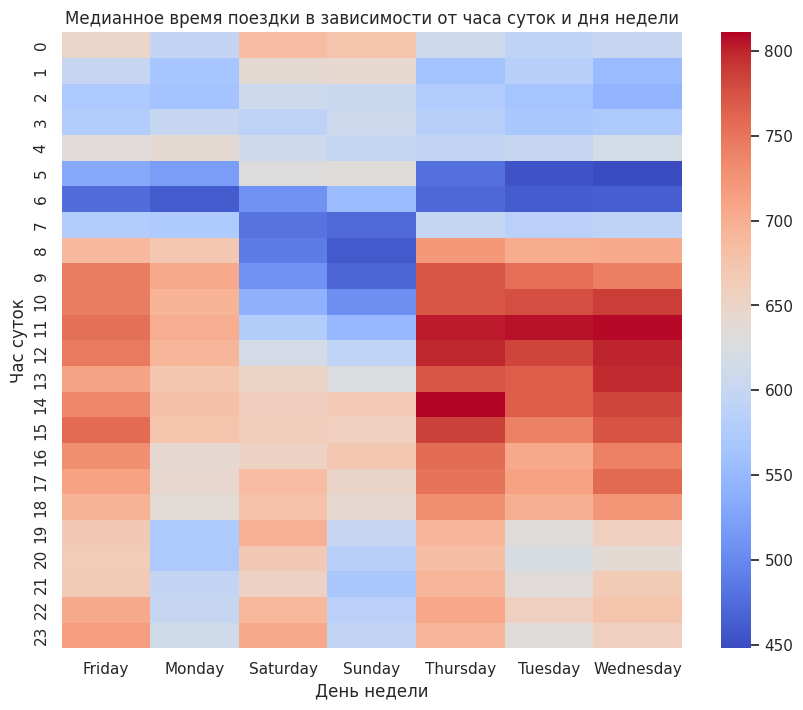

In [30]:
taxi_pivot_table = taxi_data.pivot_table(
    index='pickup_hour',
    columns='pickup_day_of_week',
    values='trip_duration',
    aggfunc=np.median,
    fill_value=0
    )
taxi_pivot_table.head(7)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(taxi_pivot_table, cmap="coolwarm").set(
    xlabel='День недели', 
    ylabel='Час суток',
    title='Медианное время поездки в зависимости от часа суток и дня недели')

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


[Text(0.5, 0, 'Longitude'), Text(0, 0.5, 'Latitude')]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



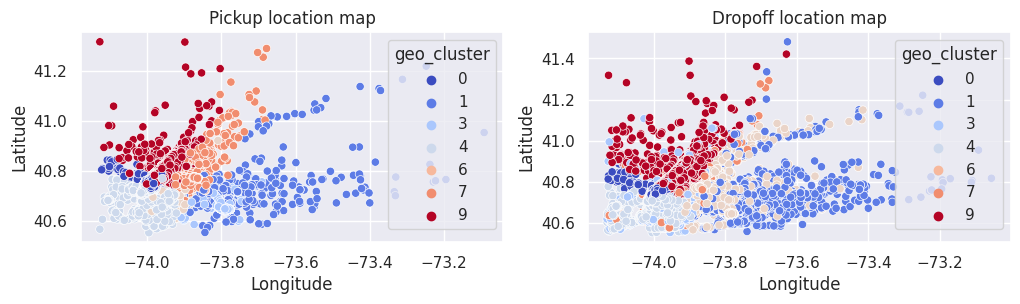

In [31]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

geo_data = taxi_data[['id', 'geo_cluster', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
geo_data = geo_data.loc[(geo_data.pickup_latitude > 40.55) & (geo_data.pickup_latitude < 41.5)]
geo_data = geo_data.loc[(geo_data.dropoff_latitude>40.55) & (geo_data.dropoff_latitude < 41.5)]
geo_data = geo_data.loc[(geo_data.dropoff_longitude > -74.13) & (geo_data.dropoff_longitude < -73.05)]
geo_data = geo_data.loc[(geo_data.pickup_longitude > -74.13) & (geo_data.pickup_longitude < -73.05)]

geo_data['pickup_latitude_round'] = geo_data['pickup_latitude'].apply(lambda x : round(x, 3))
geo_data['pickup_longitude_round'] = geo_data['pickup_longitude'].apply(lambda x : round(x, 3))
geo_data['dropoff_latitude_round'] = geo_data['dropoff_latitude'].apply(lambda x : round(x, 3))
geo_data['dropoff_longitude_round'] = geo_data['dropoff_longitude'].apply(lambda x : round(x, 3))

#fig, axes = plt.subplots(1, 2, squeeze=False, figsize=(12, 6))
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.title.set_text('Pickup location map')
ax2.title.set_text('Dropoff location map')

sns.scatterplot(data=geo_data,
    x='pickup_longitude_round',
    y='pickup_latitude_round',   
    hue = 'geo_cluster',
    palette="coolwarm",
    ax=ax1
).set(xlabel='Longitude', ylabel='Latitude')

sns.scatterplot(data=geo_data,
    x='dropoff_longitude_round',              
    y='dropoff_latitude_round',
    hue = 'geo_cluster',
    palette="coolwarm",
    ax=ax2
).set(xlabel='Longitude', ylabel='Latitude')


In [32]:
# Построим еще две тепловых карты рассеивания, показыващих географическое положение точек начала и конца маршрута.
import folium
from folium.plugins import HeatMap

start = geo_data.groupby(['pickup_latitude_round','pickup_longitude_round'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})
end = geo_data.groupby(['dropoff_latitude_round','dropoff_longitude_round'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})
pickup_map = folium.Map(location = [40.730610,-73.935242], zoom_start = 10)

heatmap = HeatMap(list(zip(start.pickup_latitude_round.values, 
                           start.pickup_longitude_round.values,
                           start.Num_Trips.values.astype(float))),
                  min_opacity = 0.3,
                  radius = 10, blur = 5,
                  max_zoom = 1)

pickup_map.add_child(heatmap)

pickup_map

In [33]:
heatmap = HeatMap(list(zip(end.dropoff_latitude_round.values, 
                           end.dropoff_longitude_round.values,
                           end.Num_Trips.values.astype(float))),
                  min_opacity = 0.3,
                  radius = 10, blur = 5,
                  max_zoom = 1)

pickup_map.add_child(heatmap)

pickup_map

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [34]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458644, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [35]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [36]:
# Столбец id является уникальным, но не несет никакой информации
# dropoff_datetime создает утечку данных
# Удалим эти столбцы из нашего датафрейма
drop_columns = ['id', 'dropoff_datetime']
train_data = train_data.drop(drop_columns, axis=1)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [37]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458644, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [38]:
def encode_vendor_id(vendor_id):
    return 0 if vendor_id == 1 else 1

def encode_store_and_fwd_flag(store_and_fwd_flag):
    return 0 if store_and_fwd_flag == 'N' else 1

train_data['vendor_id'] = train_data['vendor_id'].apply(encode_vendor_id)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(encode_store_and_fwd_flag)

print(round(train_data['vendor_id'].mean(), 2))
print(round(train_data['store_and_fwd_flag'].mean(), 3))

0.53
0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [39]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

one_hot_encoder = OneHotEncoder(drop='first')

# применяем кодирование, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(taxi_data[columns_to_change]).toarray() 
# получаем имена закодированных столбцов
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
# составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)

data_onehot.shape

(1458644, 18)

Добавим полученную таблицу с закодированными признаками:

In [40]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458644, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [41]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [42]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [43]:
# ваш код здесь
selector = SelectKBest(score_func = f_regression, k=25)
selector.fit(X_train, y_train_log)
best_features=selector.get_feature_names_out()

X_train = X_train[best_features].astype(float)
X_valid = X_valid[best_features].astype(float)

best_features

array(['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_hour', 'pickup_holiday',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'haversine_distance', 'temperature', 'pickup_day_of_week_Monday',
       'pickup_day_of_week_Saturday', 'pickup_day_of_week_Sunday',
       'pickup_day_of_week_Thursday', 'pickup_day_of_week_Tuesday',
       'pickup_day_of_week_Wednesday', 'geo_cluster_1', 'geo_cluster_3',
       'geo_cluster_5', 'geo_cluster_7', 'geo_cluster_9'], dtype=object)

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [44]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[best_features])
X_valid_scaled = scaler.transform(X_valid[best_features])

print('Среднее арифметическое для первого предиктора:', X_valid_scaled[:,0].mean().round(2))

Среднее арифметическое для первого предиктора: 0.53


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [45]:
lr = LinearRegression()

lr.fit(X_train_scaled,y_train_log)

y_pred_train_scaled= lr.predict(X_train_scaled)
y_pred_valid_scaled = lr.predict(X_valid_scaled)

RMSLE_train = mean_squared_error(y_pred_train_scaled,y_train_log, squared=False)
RMSLE_valid = mean_squared_error(y_pred_valid_scaled,y_valid_log, squared=False)

print('RMSLE train: %.2f' % RMSLE_train)
print('RMSLE valid: %.2f' % RMSLE_valid)

RMSLE train: 0.58
RMSLE valid: 0.57


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_valid_poly = poly.fit_transform(X_valid_scaled)

lr.fit(X_train_poly,y_train_log)

y_pred_train_poly = lr.predict(X_train_poly)
y_pred_valid_poly = lr.predict(X_valid_poly)

RMSLE_train_poly = mean_squared_error(y_pred_train_poly,y_train_log, squared=False)
RMSLE_valid_poly = mean_squared_error(y_pred_valid_poly,y_valid_log, squared=False)

print('RMSLE train_poly: %.2f' % RMSLE_train_poly)
print('RMSLE valid_poly: %.2f' % RMSLE_valid_poly)

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
rm = Ridge()

rm.fit(X_train_poly,y_train_log)

y_pred_train_poly = rm.predict(X_train_poly)
y_pred_valid_poly = rm.predict(X_valid_poly)


RMSLE_train_poly = mean_squared_error(y_pred_train_poly,y_train_log, squared=False)
RMSLE_valid_poly = mean_squared_error(y_pred_valid_poly,y_valid_log, squared=False)

print('RMSLE train_poly: %.2f' % RMSLE_train_poly)
print('RMSLE valid_poly: %.2f' % RMSLE_valid_poly)

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
dtr = DecisionTreeRegressor() 

# обучение дерева решений по алгоритму CART
dtr.fit(X_train_scaled, y_train_log)

# предсказание значения
y_pred_train_dtr = dtr.predict(X_train_scaled)
y_pred_valid_dtr = dtr.predict(X_valid_scaled)

# оценка предсказания
RMSLE_train_dtr = mean_squared_error(y_pred_train_dtr,y_train_log, squared=False)
RMSLE_valid_dtr = mean_squared_error(y_pred_valid_dtr,y_valid_log, squared=False)

print('RMSLE train_dtc: %.2f' % RMSLE_train_dtr)
print('RMSLE valid_dtc: %.2f' % RMSLE_valid_dtr)

RMSLE train_dtc: 0.00
RMSLE valid_dtc: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [ ]:
param_grid = {'max_depth': np.arange(3, 15)}
        
gst = GridSearchCV(
    estimator=DecisionTreeRegressor(), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
) 

gst.fit(X_train_scaled, y_train_log) 

y_pred_train_gst = gst.predict(X_train_scaled)
y_pred_valid_gst = gst.predict(X_valid_scaled)

gst.score(X_valid_scaled,y_valid_log)

RMSLE_train_gst = mean_squared_error(y_pred_train_gst,y_train_log, squared=False)
RMSLE_valid_gst = mean_squared_error(y_pred_valid_gst,y_valid_log, squared=False)

print("Наилучшие значения гиперпараметров: {}".format(gst.best_params_))
print('RMSLE train_gst: %.2f' % RMSLE_train_gst)
print('RMSLE valid_gst: %.2f' % RMSLE_valid_gst)

Наилучшие значения гиперпараметров: {'max_depth': 11}
RMSLE train_gst: 0.42
RMSLE valid_gst: 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
rfr = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42
)

#Обучаем модель
rfr.fit(X_train_scaled, y_train_log)

y_pred_train_rfr = rfr.predict(X_train_scaled)
y_pred_valid_rfr = rfr.predict(X_valid_scaled)

rfr.score(X_valid_scaled,y_valid_log)

RMSLE_train_rfr = mean_squared_error(y_pred_train_rfr,y_train_log, squared=False)
RMSLE_valid_rfr = mean_squared_error(y_pred_valid_rfr,y_valid_log, squared=False)

print('RMSLE train_rfr: %.2f' % RMSLE_train_rfr)
print('RMSLE valid_rfr: %.2f' % RMSLE_valid_rfr)

RMSLE train_rfr: 0.41
RMSLE valid_rfr: 0.42


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [47]:
gbr = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)

#Обучаем модель
gbr.fit(X_train_scaled, y_train_log)

y_pred_train_gbr = gbr.predict(X_train_scaled)
y_pred_valid_gbr = gbr.predict(X_valid_scaled)

gbr.score(X_valid_scaled,y_valid_log)

RMSLE_train_gbr = mean_squared_error(y_pred_train_gbr,y_train_log, squared=False)
RMSLE_valid_gbr = mean_squared_error(y_pred_valid_gbr,y_valid_log, squared=False)

print('RMSLE train_rfr: %.2f' % RMSLE_train_gbr)
print('RMSLE valid_rfr: %.2f' % RMSLE_valid_gbr)

RMSLE train_rfr: 0.38
RMSLE valid_rfr: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


In [ ]:
# Ответ: градиентный бустинг с результатом RMSLE 0.39 на валидационной выборке

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


<Axes: >

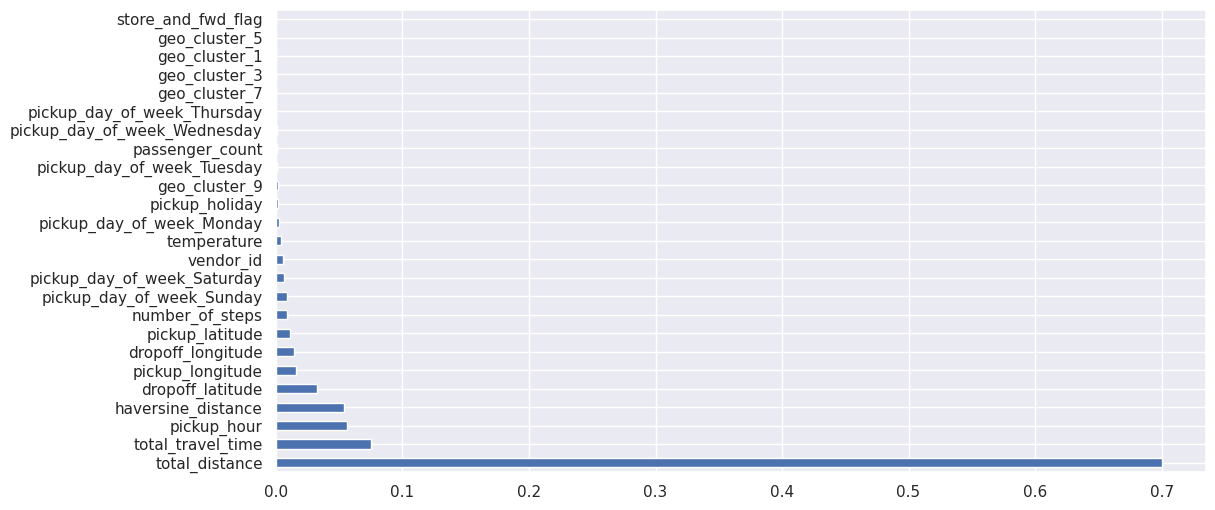

In [48]:
fig = plt.figure(figsize=(12, 6))
feat_importances = pd.Series(gbr.feature_importances_, index=best_features)
feat_importances.nlargest(25).plot(kind='barh')

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [49]:
y_valid = np.exp(y_valid_log)-1 
y_pred_valid = np.exp(gbr.predict(X_valid_scaled))-1

MeAE = median_absolute_error(y_pred_valid,y_valid)


print('MeAE для GBR: ', round(MeAE/60, 1))

MeAE для GBR:  1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [50]:
test_data = pd.read_csv("/content/drive/MyDrive/Praktikum/test_data.csv")
osrm_data_test = pd.read_csv("/content/drive/MyDrive/Praktikum/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [54]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

<ipython-input-10-dfc49ff5525f>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [55]:
# ваш код здесь
y_test_predict = np.exp(gbr.predict(X_test_scaled))-1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('/content/drive/MyDrive/Praktikum/submission_gb1.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [56]:
#!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


После чего модуль можно импортировать:

In [57]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [58]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [59]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42178	valid-rmse:5.42138
[10]	train-rmse:1.93692	valid-rmse:1.93766
[20]	train-rmse:0.78905	valid-rmse:0.79029
[30]	train-rmse:0.48443	valid-rmse:0.48571
[40]	train-rmse:0.42655	valid-rmse:0.42780
[50]	train-rmse:0.41370	valid-rmse:0.41522
[60]	train-rmse:0.40952	valid-rmse:0.41137
[70]	train-rmse:0.40543	valid-rmse:0.40753
[80]	train-rmse:0.40314	valid-rmse:0.40558
[90]	train-rmse:0.40143	valid-rmse:0.40417
[100]	train-rmse:0.40023	valid-rmse:0.40323
[110]	train-rmse:0.39872	valid-rmse:0.40201
[120]	train-rmse:0.39761	valid-rmse:0.40118
[130]	train-rmse:0.39649	valid-rmse:0.40029
[140]	train-rmse:0.39533	valid-rmse:0.39938
[150]	train-rmse:0.39394	valid-rmse:0.39829
[160]	train-rmse:0.39278	valid-rmse:0.39748
[170]	train-rmse:0.39202	valid-rmse:0.39693
[180]	train-rmse:0.39126	valid-rmse:0.39658
[190]	train-rmse:0.39074	valid-rmse:0.39636
[200]	train-rmse:0.38983	valid-rmse:0.39578
[210]	train-rmse:0.38927	valid-rmse:0.39552
[220]	train-rmse:0.38864	valid-rmse:0.39518

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [60]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('/content/drive/MyDrive/Praktikum/submission_gb.csv', index=False)

Modeling RMSLE 0.39338


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

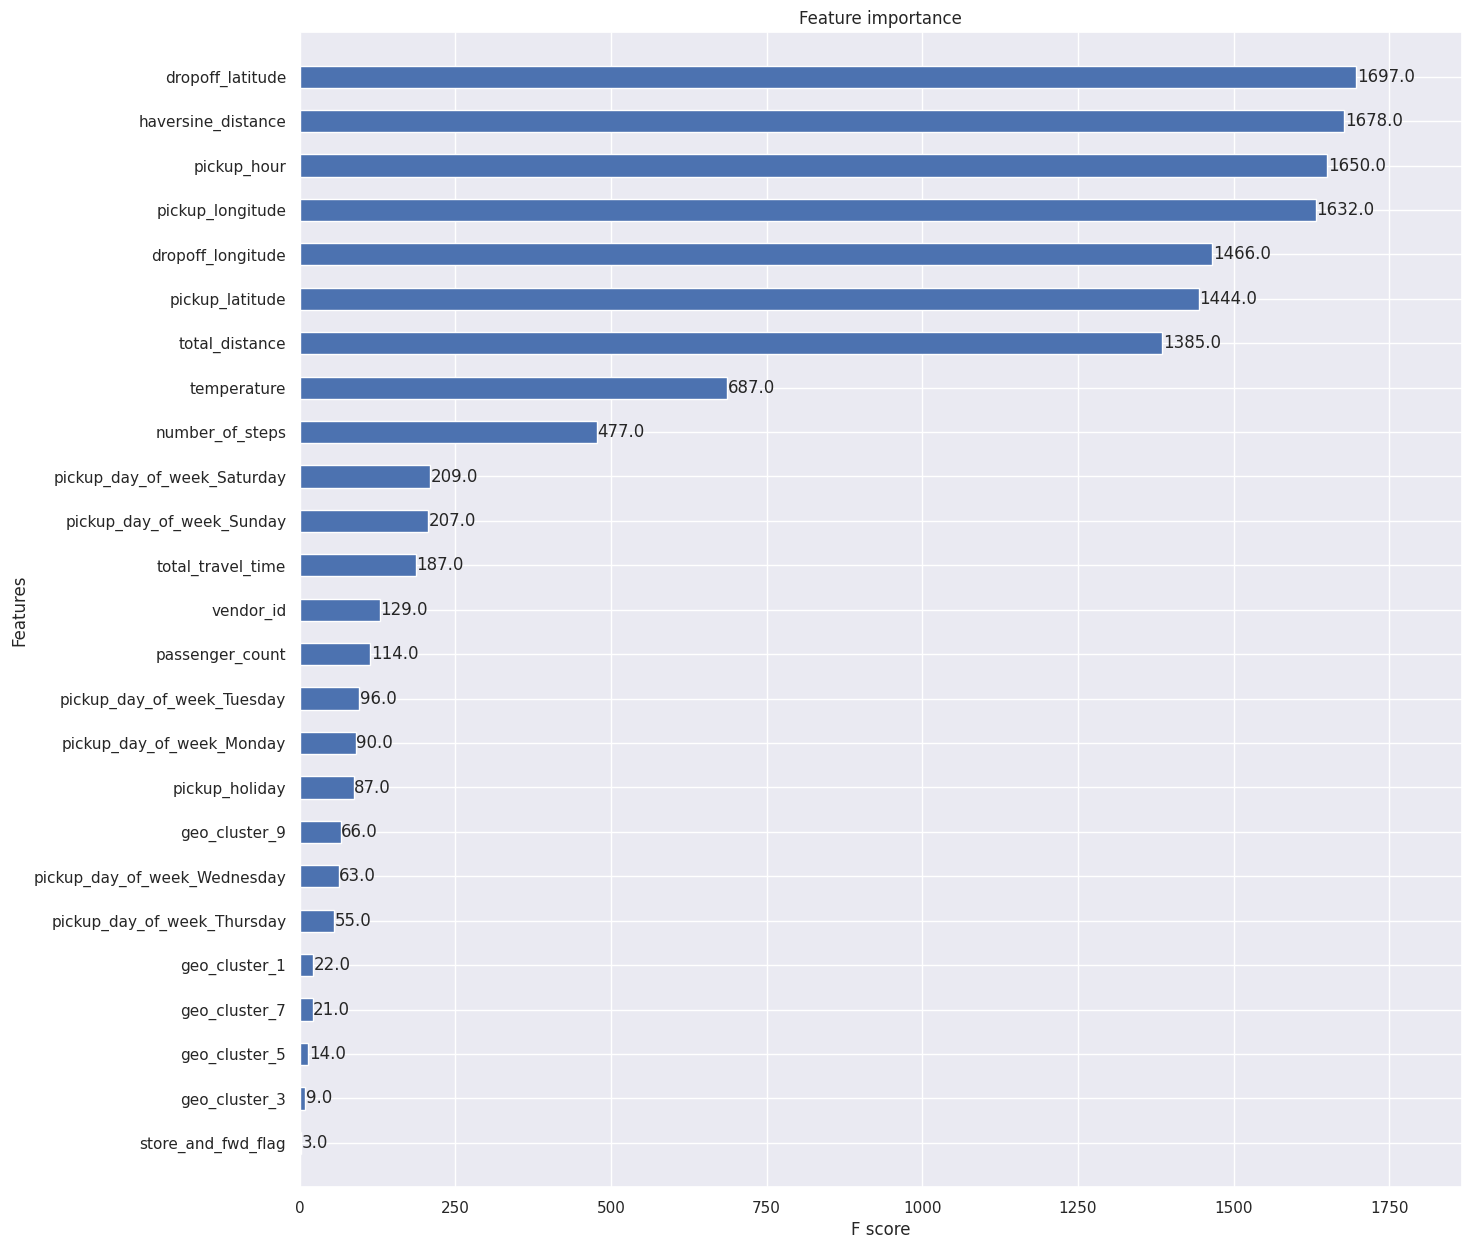

In [61]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)